<h4>Importing Libraries</h4>

In [30]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import warnings
warnings.filterwarnings("ignore")

<h4>Importing MNIST dataset</h4>

In [2]:
from tensorflow.keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

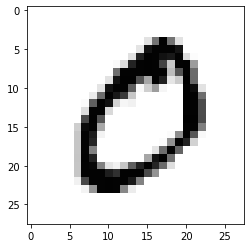

In [4]:
plt.imshow(x_train[1],cmap = "Greys")

In [5]:
y_train[1]

0

<h4>Feature Engineering</h4>

In [6]:
from tensorflow.keras.utils import to_categorical

In [7]:
y_train.shape

(60000,)

In [8]:
y_cat = to_categorical(y_train,10)
y_cat.shape

(60000, 10)

In [9]:
y_cat_test = to_categorical(y_test,10)
y_cat_test.shape

(10000, 10)

In [10]:
x_train,x_test = x_train/255,x_test/255

In [11]:
x_train = x_train.reshape(60000,28,28,1)

In [12]:
x_train.shape

(60000, 28, 28, 1)

In [14]:
x_test = x_test.reshape(10000,28,28,1)

<h4>Convolution Neural Network</h4>

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [18]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation="relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation="relu"))

model.add(Dense(10,activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(monitor="val_loss",patience=1)

In [28]:
model.fit(x_train,y_cat,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1363 - accuracy: 0.9596 - val_loss: 0.0539 - val_accuracy: 0.9832
Epoch 2/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0456 - accuracy: 0.9862 - val_loss: 0.0367 - val_accuracy: 0.9887
Epoch 3/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0286 - accuracy: 0.9912 - val_loss: 0.0425 - val_accuracy: 0.9861


<h4>Model Evaluation</h4>

In [31]:
metrics = pd.DataFrame(model.history.history)

<AxesSubplot:>

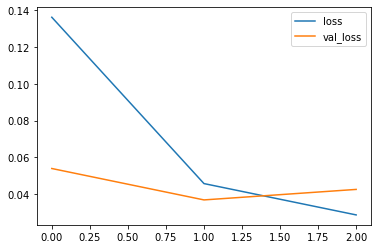

In [33]:
metrics[["loss","val_loss"]].plot()

<AxesSubplot:>

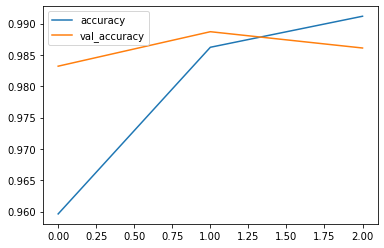

In [34]:
metrics[["accuracy","val_accuracy"]].plot()

In [35]:
model.metrics_names

['loss', 'accuracy']

In [37]:
model.evaluate(x_test,y_cat_test,verbose=0)

[0.042464591562747955, 0.9861000180244446]

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [49]:
y_cat_test.shape

(10000, 10)

In [50]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.98      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.99      0.98      1028
           8       0.99      0.98      0.98       974
           9       1.00      0.95      0.97      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [52]:
confusion_matrix(y_test,predictions)

array([[ 974,    0,    0,    0,    0,    0,    5,    1,    0,    0],
       [   0, 1131,    1,    1,    0,    0,    2,    0,    0,    0],
       [   0,    2, 1019,    0,    2,    0,    1,    7,    1,    0],
       [   0,    0,    4, 1002,    0,    1,    0,    1,    2,    0],
       [   0,    0,    0,    0,  980,    0,    1,    0,    0,    1],
       [   1,    0,    0,   12,    0,  870,    7,    0,    2,    0],
       [   2,    2,    0,    0,    2,    1,  949,    0,    2,    0],
       [   1,    1,    4,    0,    0,    0,    0, 1020,    1,    1],
       [   2,    0,    4,    0,    4,    0,    3,    4,  955,    2],
       [   3,    3,    1,    6,   11,    7,    0,   13,    4,  961]],
      dtype=int64)

<AxesSubplot:>

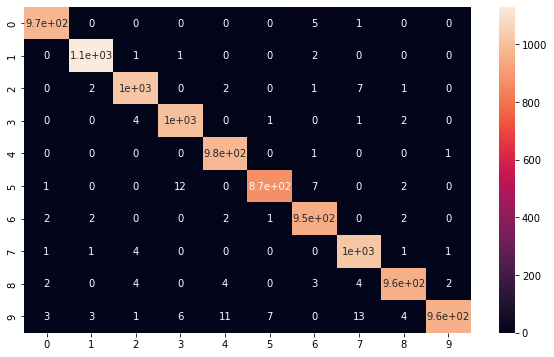

In [56]:
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,predictions),annot = True)

<h4>Model Prediction</h4>

In [57]:
my_number = x_test[0]

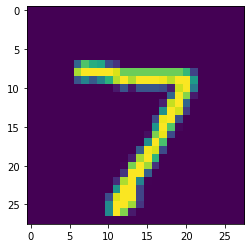

In [58]:
plt.imshow(my_number.reshape(28,28))

In [61]:
model.predict_classes(my_number.reshape(1,28,28,1))

array([7], dtype=int64)